# Portfolio Analysis

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math

import warnings
warnings.filterwarnings("ignore")

# fix_yahoo_finance is used to fetch data 
import yfinance as yf
yf.pdr_override()

In [31]:
# input
symbols = ['FB','AAPL','AMZN','TSLA','MSFT','GOOG','NFLX','NVDA']
start = '2012-01-01'
end = '2022-04-28'

# Read data 
dataset = yf.download(symbols,start,end)['Adj Close']

# View Columns
dataset.head()

[*********************100%***********************]  8 of 8 completed


,AAPL,AMZN,FB,GOOG,MSFT,NFLX,NVDA,TSLA
Date,,,,,,,,
2012-01-03,12.575917,179.029999,NaN,331.462585,21.623138,10.320000,3.223773,5.616
2012-01-04,12.643500,177.509995,NaN,332.892242,22.132010,11.492857,3.260511,5.542
2012-01-05,12.783868,177.610001,NaN,328.274536,22.358171,11.328571,3.377616,5.424
2012-01-06,12.917508,182.610001,NaN,323.796326,22.705507,12.327143,3.338580,5.382
2012-01-09,12.897019,178.559998,NaN,310.067780,22.406643,14.025714,3.338580,5.450


In [32]:
# Calculate Daily Returns
returns = dataset.pct_change()

In [33]:
returns = returns.dropna()

In [34]:
returns.head()

,AAPL,AMZN,FB,GOOG,MSFT,NFLX,NVDA,TSLA
Date,,,,,,,,
2012-05-21,0.058261,0.019920,-0.109861,0.022835,0.016399,0.025443,0.017384,0.043904
2012-05-22,-0.007679,-0.012746,-0.089039,-0.021674,0.000336,-0.056175,-0.012205,0.070560
2012-05-23,0.024400,0.009056,0.032258,0.014414,-0.021841,0.062029,0.024712,0.007143
2012-05-24,-0.009184,-0.009389,0.032187,-0.009517,-0.001374,-0.022806,-0.026528,-0.023856
2012-05-25,-0.005359,-0.010918,-0.033909,-0.020094,-0.000344,-0.000711,0.023947,-0.015522


In [100]:
# Calculate mean returns
meanDailyReturns = returns.mean()
print(meanDailyReturns)

AAPL         0.001066
AMZN         0.001207
FB           0.000894
GOOG         0.000946
MSFT         0.001122
NFLX         0.001639
NVDA         0.002028
TSLA         0.002649
Portfolio    0.001444
dtype: float64


In [36]:
# Calculate std returns
stdDailyReturns = returns.std()
print(stdDailyReturns)

AAPL    0.017841
AMZN    0.019210
FB      0.023884
GOOG    0.016160
MSFT    0.016366
NFLX    0.030504
NVDA    0.026520
TSLA    0.035301
dtype: float64


In [114]:
# Define weights for the portfolio
weights = np.array([0.125, 0.125, 0.125,0.125, 0.125,0.125, 0.125, 0.125,0])

In [116]:
# Calculate the covariance matrix on daily returns
cov_matrix = (returns.cov())*250
print (cov_matrix)

               AAPL      AMZN        FB      GOOG      MSFT      NFLX  \
AAPL       0.079577  0.039915  0.043259  0.038295  0.042723  0.036839   
AMZN       0.039915  0.092256  0.053773  0.046565  0.044325  0.064650   
FB         0.043259  0.053773  0.142613  0.049439  0.042491  0.057948   
GOOG       0.038295  0.046565  0.049439  0.065288  0.043623  0.048752   
MSFT       0.042723  0.044325  0.042491  0.043623  0.066963  0.044526   
NFLX       0.036839  0.064650  0.057948  0.048752  0.044526  0.232629   
NVDA       0.058327  0.058191  0.062088  0.053978  0.061284  0.067751   
TSLA       0.053212  0.057767  0.056825  0.047463  0.051236  0.077048   
Portfolio  0.049018  0.057180  0.063554  0.049175  0.049646  0.078768   

               NVDA      TSLA  Portfolio  
AAPL       0.058327  0.053212   0.049018  
AMZN       0.058191  0.057767   0.057180  
FB         0.062088  0.056825   0.063554  
GOOG       0.053978  0.047463   0.049175  
MSFT       0.061284  0.051236   0.049646  
NFLX       

In [117]:
# Calculate expected portfolio performance
portReturn = np.sum(meanDailyReturns*weights)

In [118]:
# Print the portfolio return
print(portReturn)

0.0014439057495694767


In [119]:
# Create portfolio returns column
returns['Portfolio'] = returns.dot(weights)

In [120]:
returns.head()

,AAPL,AMZN,FB,GOOG,MSFT,NFLX,NVDA,TSLA,Portfolio
Date,,,,,,,,,
2012-05-21,0.058261,0.019920,-0.109861,0.022835,0.016399,0.025443,0.017384,0.043904,0.011786
2012-05-22,-0.007679,-0.012746,-0.089039,-0.021674,0.000336,-0.056175,-0.012205,0.070560,-0.016078
2012-05-23,0.024400,0.009056,0.032258,0.014414,-0.021841,0.062029,0.024712,0.007143,0.019021
2012-05-24,-0.009184,-0.009389,0.032187,-0.009517,-0.001374,-0.022806,-0.026528,-0.023856,-0.008808
2012-05-25,-0.005359,-0.010918,-0.033909,-0.020094,-0.000344,-0.000711,0.023947,-0.015522,-0.007864


In [121]:
# Calculate cumulative returns
daily_cum_ret=(1+returns).cumprod()
print(daily_cum_ret.tail())

                 AAPL       AMZN        FB      GOOG       MSFT       NFLX  \
Date                                                                         
2022-04-21  10.260385  13.869160  4.919435  8.354817  11.722749  21.834477   
2022-04-22   9.974929  13.500117  4.815851  7.998824  11.439710  21.564323   
2022-04-25  10.042132  13.661351  4.891185  8.241970  11.718992  21.003002   
2022-04-26   9.667278  13.036334  4.733194  7.991602  11.280657  19.851343   
2022-04-27   9.653098  12.921861  4.576249  7.691647  11.823357  18.864779   

                 NVDA        TSLA  Portfolio  
Date                                          
2022-04-21  72.764814  183.015242  28.925732  
2022-04-22  70.356502  182.338529  28.233657  
2022-04-25  71.751739  181.063136  28.501667  
2022-04-26  67.735488  159.002172  27.020258  
2022-04-27  66.390724  159.925616  26.694076  


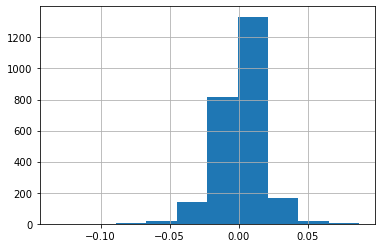

In [122]:
returns['Portfolio'].hist()
plt.show()

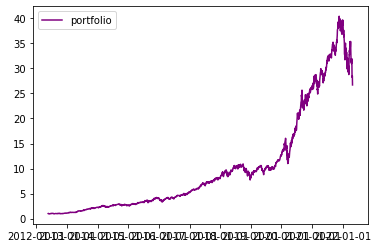

In [123]:
import matplotlib.dates

# Plot the portfolio cumulative returns only
fig, ax = plt.subplots()
ax.plot(daily_cum_ret.index, daily_cum_ret.Portfolio, color='purple', label="portfolio")
ax.xaxis.set_major_locator(matplotlib.dates.YearLocator())
plt.legend()
plt.show()

In [124]:
# Print the mean
print("mean : ", returns['Portfolio'].mean()*100)

# Print the standard deviation
print("Std. dev: ", returns['Portfolio'].std()*100)

# Print the skewness
print("skew: ", returns['Portfolio'].skew())

# Print the kurtosis
print("kurt: ", returns['Portfolio'].kurtosis())

mean :  0.14439057495694776
Std. dev:  1.607540832027899
skew:  -0.5028941655968493
kurt:  4.843696386947798


In [125]:
# Calculate the standard deviation by taking the square root
port_standard_dev = np.sqrt(np.dot(weights.T, np.dot(weights, cov_matrix)))

# Print the results 
print(str(np.round(port_standard_dev, 8) * 100) + '%')

25.417452%


In [126]:
# Calculate the portfolio variance
port_variance = np.dot(weights.T, np.dot(cov_matrix, weights))

# Print the result
print(str(np.round(port_variance, 8) * 100) + '%')

6.460469000000001%


In [127]:
# Calculate total return and annualized return from price data 
total_return = (returns['Portfolio'][-1] - returns['Portfolio'][0]) / returns['Portfolio'][0]
print(total_return)

-2.0242768661450894


In [128]:
returns['Portfolio'][-1]

-0.012071749650697267

In [129]:
returns['Portfolio'][0]

0.011785631453466117

In [130]:
returns['Portfolio']

Date
2012-05-21    0.011786
2012-05-22   -0.016078
2012-05-23    0.019021
2012-05-24   -0.008808
2012-05-25   -0.007864
                ...   
2022-04-21   -0.026507
2022-04-22   -0.023926
2022-04-25    0.009493
2022-04-26   -0.051976
2022-04-27   -0.012072
Name: Portfolio, Length: 2501, dtype: float64

In [131]:
# Annualize the total return over 10 year 
annualized_return = ((total_return + 1)**(1/10))-1
print(annualized_return)

nan


In [132]:
# Calculate annualized volatility from the standard deviation
vol_port = returns['Portfolio'].std() * np.sqrt(1000)

In [133]:
# Calculate the Sharpe ratio 
rf = 0.01
sharpe_ratio = ((annualized_return - rf) / vol_port)
print (sharpe_ratio)

nan


If the analysis results in a negative Sharpe ratio, it either means the risk-free rate is greater than the portfolio's return, or the portfolio's return is expected to be negative. 

In [134]:
# Create a downside return column with the negative returns only
target = 0
downside_returns = returns.loc[returns['Portfolio'] < target]

# Calculate expected return and std dev of downside
expected_return = returns['Portfolio'].mean()
down_stdev = downside_returns.std()

# Calculate the sortino ratio
rf = 0.01
sortino_ratio = (expected_return - rf)/down_stdev

# Print the results
print("Expected return: ", expected_return*100)
print('-' * 50)
print("Downside risk:")
print(down_stdev*100)
print('-' * 50)
print("Sortino ratio:")
print(sortino_ratio)

Expected return:  0.14439057495694776
--------------------------------------------------
Downside risk:
AAPL         1.614927
AMZN         1.606079
FB           2.150204
GOOG         1.381397
MSFT         1.460765
NFLX         2.631706
NVDA         2.240848
TSLA         2.954914
Portfolio    1.253606
dtype: float64
--------------------------------------------------
Sortino ratio:
AAPL        -0.529813
AMZN        -0.532732
FB          -0.397920
GOOG        -0.619380
MSFT        -0.585727
NFLX        -0.325116
NVDA        -0.381824
TSLA        -0.289555
Portfolio   -0.682519
dtype: float64


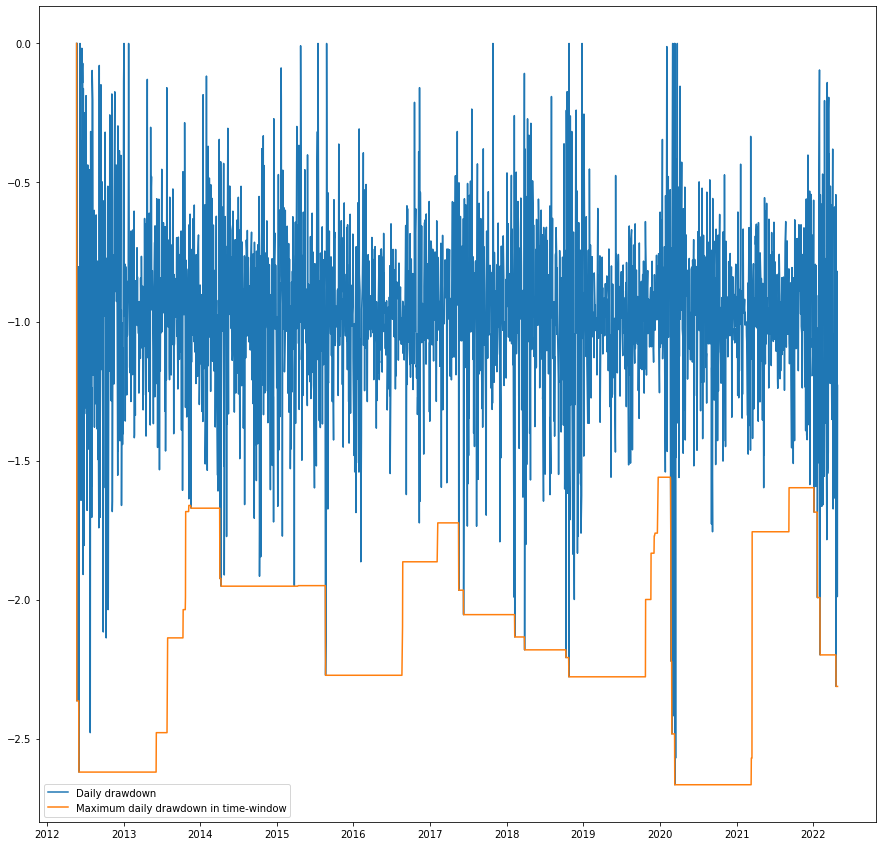

In [135]:
# Calculate the max value 
roll_max = returns['Portfolio'].rolling(center=False,min_periods=1,window=252).max()

# Calculate the daily draw-down relative to the max
daily_draw_down = returns['Portfolio']/roll_max - 1.0

# Calculate the minimum (negative) daily draw-down
max_daily_draw_down = daily_draw_down.rolling(center=False,min_periods=1,window=252).min()

# Plot the results
plt.figure(figsize=(15,15))
plt.plot(returns.index, daily_draw_down, label='Daily drawdown')
plt.plot(returns.index, max_daily_draw_down, label='Maximum daily drawdown in time-window')
plt.legend()
plt.show()